In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

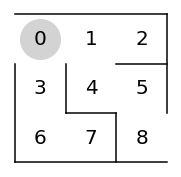

In [32]:
fig = plt.figure(figsize=(3,3))

# 製作牆壁(畫線)
plt.plot([0,3], [3,3], color='k')
plt.plot([0,3], [0,0], color='k')
plt.plot([0,0], [0,2], color='k')
plt.plot([3,3], [1,3], color='k')
plt.plot([1,1], [1,2], color='k')
plt.plot([2,3], [2,2], color='k')
plt.plot([2,1], [1,1], color='k')
plt.plot([2,2], [0,1], color='k')

# 製作編號
for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20,
                ha='center', va='center')
        
# 製作當前位置的圓圈
circle = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

# 隱藏繪圖區的軸刻度和邊框
plt.tick_params(axis='both', which='both', bottom=False,
                top=False, labelbottom=False, right=False, left=False, labelleft=False)

plt.box(False)

In [34]:
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, 1, 1],
    [np.nan, np.nan, np.nan, 1],
    [1, np.nan, 1, np.nan],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1]
])

In [36]:
# 設定初始的動作價值函數表
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0
print(Q)

[[       nan 0.04964481 0.0071809         nan]
 [       nan 0.46309668 0.75149732 0.45483105]
 [       nan        nan        nan 0.62142445]
 [0.85372871        nan 0.14047063        nan]
 [0.71230361 0.30016797        nan        nan]
 [       nan        nan 0.69666561 0.99436132]
 [0.70195591 0.63252903        nan        nan]
 [       nan        nan        nan 0.58823808]]


In [38]:
# 以 epsilon機率 隨機探索 或 根據動作價值函數表選擇動作
def get_a(s, Q, epsilon, pi_0):
    if np.random.rand() < epsilon:
        return np.random.choice([0, 1, 2, 3], p=pi_0[s])
    else:
        return np.nanargmax(Q[s])

In [39]:
# 根據動作取得下一個狀態
def get_next_s(s, a):
    if a == 0:
        return s - 3
    elif a == 1:
        return s + 1
    elif a == 2:
        return s + 3
    elif a == 3:
        return s - 1